In [1]:
"""
-손실 곡선

history 클래스 객체
history 객체에는 훈련 과정에서 계산한 지표, - 즉 손실과 정확도 값이 저장되어있다
이 값을 사용하면 그래프를 그림

패션 MNIST 데이터셋을 적재하고 훈련 세트와 검증 세트로 나눔
"""
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(
train_scaled, train_target, test_size=0.2, random_state=42)

In [2]:
"""
간단한 모델 정의
특징 옵티마이저가 없다
"""
def model_fn(a_layer=None):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28, 28)))
    model.add(keras.layers.Dense(100, activation="relu"))
    if a_layer:
        model.add(a_layer)
    model.add(keras.layers.Dense(10, activation="softmax"))
    return model

In [3]:
"""
model_fn 함수 호출
"""
model = model_fn()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [4]:
"""
모델을 훈련 fit()메서드의 결과를
history 변수에 담아보기

여기서 verbose 매개변수로 훈련 과정 출력을 조정함
기본값은 1
2로 바꾸면 진행 막대를 빼고 출력
0으로 지정하면 훈련 과정은 나타내지 않는다
"""
model.compile(loss="sparse_categorical_crossentropy", metrics="accuracy")
history = model.fit(train_scaled, train_target, epochs=5, verbose=0)

In [5]:
"""
history 객체에는 훈련 측정값이 담겨져 있는 history 딕셔너리가 있다

손실과 정확도가 포함 되어있다
정확도는 compile()메서드에서 metrics 매개변수에 accuracy를 추가해서 history 속성에 포함됨
"""
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


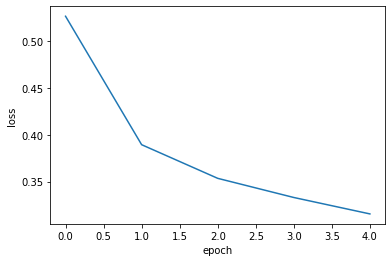

In [6]:
"""
history 속성에 포함된 손실과 정확도는 에포크마다 계산한 값이 
순서대로 나열된 단순한 리스트
손실 그래프로 그려봄
y축은 손실값
"""
import matplotlib.pyplot as plt
plt.plot(history.history["loss"])
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

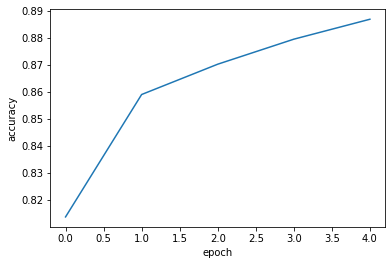

In [8]:
"""
정확도를 출력

"""
plt.plot(history.history["accuracy"])
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.show()

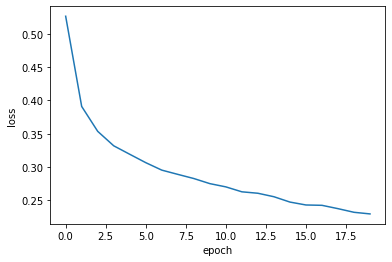

In [9]:
"""
이번에는 에포크 횟수를 20으로 늘려서 모델을 훈련 
손실 그래프 그려봄

손실이 잘 감소함 -
"""
model = model_fn()
model.compile(loss = "sparse_categorical_crossentropy", metrics="accuracy")
history = model.fit(train_scaled, train_target, epochs=20, verbose=0)
plt.plot(history.history["loss"])
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

In [11]:
"""
- 검증 손실
경사 하강법

에포크에 따른 과대적합과 과소적함을 파악하려면 훈련 세트에 대한 점수뿐만 아니라 
검증 세트에 대한 점수도 필요함
앞에서처럼 훈련 세트의 손실만 그려서는 안되죠
정확도를 사용하여 과대/과소적합을 설명했지만 
이번에는 손실을 사용하여 과대/과소적합을 다룸

-손실을 사용하는 것과 정확도를 사용하는것은 어떤차이가 있나??
인공 신경망 모델이 최적화하는 대상은 정확도가 아니라 손실 함수임. 이따금 손실 감소에 비례하여 정확도가 
높아지지 않는 경우도 있다. 따라서 모델이 잘 훈련되었는지  판단하려면 정확도보다는 손실 함수의 값을 확인하는 것이 더 좋다

에포크마다 검증 손실을 계산하기 위해 케라스 모델의 fit() 메서드에 검증 데이터를 전달할 수 있다
validation_data 매개변수에 검증에 사용할 입력과 타깃값을 튜플로 만들어 전달

특징 옵티마이저가 없다
"""
model = model_fn()
model.compile(loss = "sparse_categorical_crossentropy", metrics="accuracy")
history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                   validation_data = (val_scaled, val_target))

In [12]:
"""
반환된 history.hisotry딕셔너리에 어떤 값이 들어있는지 확인
"""
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


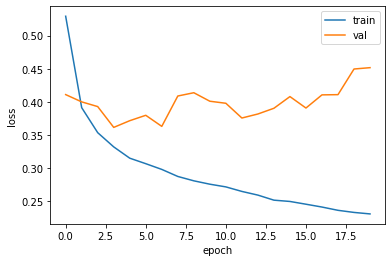

In [13]:
"""
검증 세트에 대한 손실은 val_loss 에 들어 있고 정확도는 val_accuracy에 들어 있다
과대/과소적합 문제를 조사하기 위해 훈련 손실과 검증 손실을 한 그래프에 그려서 비교

-초기에 검증 손실이 감소하다가 다섯 번째 에포크만에 다시 상승하기 시작하는 모습
훈련 손실은 꾸준히 감소하기 때문에 전형적인 과대적합 모델이 생성됨
검증 손실이 상승하는 시점을 가능항 뒤로 늦추면 검증 세트에 대한 손실이 줄어들 뿐만 아니라
검증 세트에 대한 정확도도 증가할 것
-현재는 옵티마이저가 없다
"""
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend(["train", "val"])
plt.show()

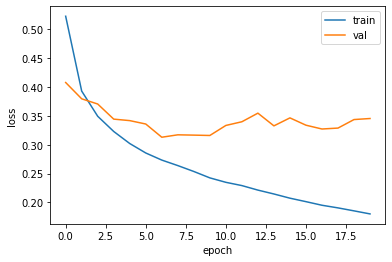

In [14]:
"""
옵티마이저 하이퍼파라미터를 조정하여 과대적합을 완화시킬 수 있는지 확인

기본 RMSprop 옵티마이저는 많은 문제에서 잘 동작함
만약 이 옵티마이저 대신 다른 옵티마이저를 테스트해 본다면 Adam이 좋은 선택
Adam은 적응적 학습률을 사용하기 때문에 에포크가 진행되면서 학습률의 크기를 조정할 수 있다

과대적합이 줄어든 모습
Adam 옵티마이저가 이 데이터셋에 잘 맞는다는 뜻
"""
model = model_fn()
model.compile(optimizer = "adam", loss="sparse_categorical_crossentropy", metrics="accuracy")
history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                   validation_data=(val_scaled, val_target))
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend(["train", "val"])
plt.show()

In [15]:
"""
신경망에서 사용하는 대표적인 규제 방법
- 드롭아웃
드롭아웃 훈련 과정에서 층에 일부 뉴련을 랜덤하게 꺼서 과대적합을 막는다

어떤 샘플을 처리할 때는 은닉층의 두번째 뉴런이 드롭아웃 되며
다른 샘플은 은닉층 첫번째 뉴런이 드롭아웃 되며
뉴런은 랜덤하게 드롭아웃 되고 얼마나 많은 뉴런을 드롭할지 우리가 정해야하는 하이퍼파라미터

- 특징 드롭아웃이 특허입니다

드롭아웃은 특정 뉴련에 과대하게 의존하는것을 줄일수 있고 모든 입력에 주의를 기울여야함
또는 드롭아웃이 2개의 신경망을 앙상블 하는것처럼 보일수 있다

케라스에서는 드롭아웃을 keras.layers 패키지 아래 Dropout 클래스로 제공
어떤 층의 뒤에 드롭아웃을 두어 이층의 출력을 랜덤하게 0으로 만듬

model_fn()함수에 드롭아웃 객체를 전달하여 층에 추가해봄
30%정도 드롭아웃함
"""
model = model_fn(keras.layers.Dropout(0.3))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_10 (Dense)            (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_11 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


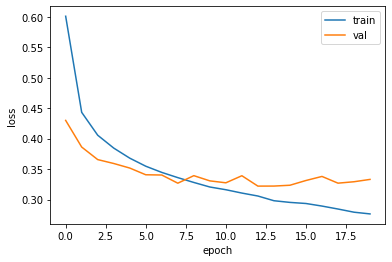

In [16]:
"""
출력 결과에서 볼 수 있듯이 은닉층 뒤에 추가된 드롭아웃 층(Dropout)은 훈련되는 모델 파라미터가 없다
입력과 출력의 크기가 같다
일부 뉴런의 출력은 0 으로 만들지만 전체출력 배열의 크기를 바꾸지 않는다

물론 훈련이 끝난 뒤에 평가나 예측을 수행할 때는 드롭아웃을 적용하지 말아야함
훈련된 모든 뉴런을 사용해야 올바른 예측을 수행할 수 있다
텐서플로와 케라스는 모델을 평가와 예측에 사용할 때는 자동으로 드롭아웃을 적용하지 않는다

훈련 손실과 검증 손실의 그래프를 그려 비교
"""
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics="accuracy")
history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                   validation_data=(val_scaled, val_target))
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend(["train", "val"])
plt.show()

In [ ]:
"""
과대 적합이 확실히 줄어듬
열 번째 에포크 정도에서 검증 손실의 감소가 멈추지만 크게 상승하지 않고 어느정도 유지

이 모델은 20번의 에포크 동안 훈련을 했기 떄문에 결국 다시 과대적합이 되었다
과대적합 되지 않은 모델을 얻기위해 에포크 횟수를 10으로 하고 다시 훈련
"""

In [17]:
"""
-모델 저장과 복원
에포크 횟수를 10으로 다시 지정하고 모델을 훈련

"""
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics="accuracy")
history = model.fit(train_scaled, train_target, epochs=10, verbose=0,
                   validation_data=(val_scaled, val_target))

In [18]:
"""
케라스 모델은 훈련된 모델의 파라미터를 저장하는 간편한 save_weights() 메서드를 제공
기본적으로 이 메서드는 텐서플로의 체크포인트 포맷으로 저장하지만 파일의 확장자가 ".h5"일 경우
HDF5포맷으로 저장
"""
model.save_weights("model-weights.h5")

In [19]:
"""
또한 모델 구조와 모델 파라미터를 함께 저장하는 save()메서드를 제공
기본적으로 이 메서드는 텐서플로의 SavedModel 포맷으로 저장하지만 파일의 확장자가 ".h5"일 경우
HDF5 포맷으로 저장
"""
model.save("model-whole.h5")

In [20]:
"""
생성된 파일 확인
윈도우라 직접 가서 확인 또는 메뉴로 확인
"""


'ls'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


In [22]:
"""
두가지 방식으로 훈련해봄
첫 번째는 훈련을 하지 않은 새로운 모델을 만들고 model-weights.h5 파일에서 훈련된 모델 파라미터를 읽어서 사용
두 번째는 아예 model-whole.h5 파일에서 새로운 모델을 만들어 사용

첫번째 부터 해봄

훈련하지 않은 새로운 모델을 만들고 이전에 저장했던 모델 파라미터를 적재함
이때 사용하는 메서드는 save_weights()와 쌍을 이루는 load_weights()메서드
"""
model = model_fn(keras.layers.Dropout(0.3))
model.load_weights("model-weights.h5")

In [23]:
"""
이 모델의 검증 정확도를 확인 
케라스에서 예측을 수행하는 predict() 메서드는 사이킥런과 달리 
샘플마다 10개의 클래스에 대한 확률을 반환함
패션 MNIST 데이터셋이 다중 분류 문제이기 때문

패션 MNIST 데이터셋에서 덜어낸 검증 세트의 샘플 개수는 12000개 
predict()메서드는 (12000, 10)크기의 배열을 반환

"""
import numpy as np
val_labels = np.argmax(model.predict(val_scaled), axis=-1)
print(np.mean(val_labels== val_target))

0.8739166666666667


In [24]:
"""
이번에는 모델 전체를 파일에서 읽은 다음 검증 세트의 정확도를 출력해봄
모델이 저장된 파일을 읽을 떄는 케라스가 제공하는 load_model()함수를 사용

-여기서는 evaluate()메서드를 사용할수 있는이유 
load_model()함수는 모델 파라미터뿐만 아니라 모델 구조와 옵티마이저 상태까지 
모두 복원하기 때문에 evaluate()메서드를 사용할 수 있다
텐서플로2.3 에서는 load_model()함수의 버그 때문에 evaluate()메서드를 사용하기 전에 
compile() 메서드를 호출해야함 - 버그문서있음

- 같은 모델을 저장하고 다시 불렀기 떄문에 동일한 정확도를 얻음
"""
model = keras.models.load_model("model-whole.h5")
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3505 - accuracy: 0.8739


[0.35052502155303955, 0.8739166855812073]

In [27]:
"""
- 콜백
콜백은 훈련 과정 중간에 어떤 작업을 수행할 수 있게 하는 객체로 keras.callbacks 패키지 아래에 있는 클래스
fit() 메서드의 callbacks 매개변수에 리스트로 전달하여 사용함
여기서 사용할 ModelCheckpoint 콜백은 기본적으로 에포크마다 모델을 저장함
save_best_only=True 매개변수를 지정하여 가장 낮은 검증 점수를 만드는 모델을 저장할 수 있다
저장될 파일 이름을 "best-model.h5"로 지정하여 콜백을 적용
"""
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics="accuracy")
checkpoint_cb = keras.callbacks.ModelCheckpoint("best-model.h5", save_best_only=True)
model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target),
         callbacks=[checkpoint_cb])

In [29]:
"""
model_fn()함수로 모델을 만들고 compile()메서드를 호출하는 것은 이전과 동일
ModelCheckpoint 클래스의 객체 checkpoint_cb를 만든 후 fit()메서드의 callbacks 매개변수에 
리스트로 감싸서 전달함
모델이 훈련한 후에 best-model.h5 최상의 검증 점수를 낸 모델이 저장됨
이 모델을 load_model()함수로 다시 읽어서 예측
"""
model = keras.models.load_model("best-model.h5")
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3165 - accuracy: 0.8892


[0.31650814414024353, 0.8892499804496765]

In [30]:
"""
과대적합이 시작되기 전에 훈련을 미리 중지하는 것을 조기종료 
조기 종료는 훈련 에포크 횟수를 제한하는 역할이지만 모델이 과대적합 되는 것을 막아 주기 때문에
규제 방법 중 하나로 생각할수 있다
케라스에는 조기 종류를 위한 EarlyStopping 콜백을 제공함
콜백의 patience 매개변수는 검증 점수가 향상되지 않더라도 참을 에포크 횟수로 지정함
예를 들어 patience =2 로 지정하면 2번 연속 검증 점수가 향상되지 않으면 훈련을 중지함
또한 restore_best_weights 매개변수를 True로 지정하면 가장 낮은 검증 손실을 낸 모델 파라미터로 되돌림

EarlyStopping 콜백을 ModelCheckpoint 콜백과 함께 사용하면 가장 낮은 검증 손실의 모델을 파일에 저장하고 
검증 손실이 다시 상승할때 훈련을 중지할 수 있다
또한 훈련을 중지한 다음 현재 모델의 파라미터를 최상의 파라미터로 되돌림
"""
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer = "adam", loss="sparse_categorical_crossentropy", metrics="accuracy")
checkpoint_cb = keras.callbacks.ModelCheckpoint("best-model.h5", save_best_only = True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                   validation_data=(val_scaled, val_target),
                   callbacks=[checkpoint_cb, early_stopping_cb])

In [31]:
"""
EarlyStopping 콜백을 추가한 것 외에는 이전과 동일
훈련을 마치고 나면 몇 번째 에포크에서 훈련이 중지되었는지
early_stopping_cb 객체의 stopped_epoch 속성을 확인
"""
print(early_stopping_cb.stopped_epoch)

8


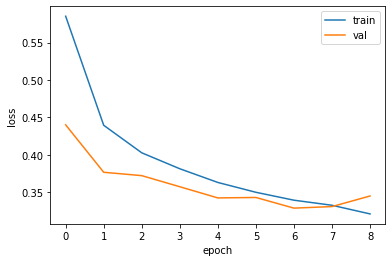

In [32]:
"""
훈련 손실과 검증 손실을 출력
"""
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend(["train", "val"])
plt.show()

In [33]:
"""
6번째 에포크에서 가장 낮은 손실을 기록
8번째 에포크에서 훈련이 중지됨
- 단 훈련때 마다 다른 에포크 횟수가 나올수 있다
조기 종료로 얻은 모델을 사용해 검증 세트에 대한 성능을 확인
"""
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3288 - accuracy: 0.8764


[0.32884398102760315, 0.8764166831970215]